# 0. Introdução

**Trabalho**:

Aluno: Maicon Dall'Agnol

R.A.: 151161868

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois datasets específicos para a tarefa de Regras de Associação. Não tente "produzir" um dataset como esse. Possivelmente, você irá falhar nisso. O dataset para Regras de Associação deve conter transações.

- Para cada dataset, você irá aplicar os algoritmos APriori e FP-Growth. Seu objetivo é minerar regras que contenham informações relevantes no dataset, seja porque alguma combinação de itens aparece com muita frequência, seja porque alguma combinação de itens não aparece com muita frequência mas está se destacando. Para isso, você deve variar os parâmetros de suporte, confiança e lift.

- Existem duas métricas não estudadas em sala de aula, 'leverage' e 'conviction', que estão disponibilizadas no pacote mlxtend para regras de associação. Estude essas métricas e explique como elas podem contribuir para as análises dos seus datasets. (Veja: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

- No relatório, você deverá explicar como usou os parâmetros para a mineração e o que foi obtido. As regras selecionadas devem ser exibidas com suas medidas equivalentes (suporte, confiança, lift, leverage, conviction). Mostre as regras que você considerou mais relevantes e justifique por quê.

- Compare os resultados gerados pelos dois algoritmos. Conclua sobre as diferenças encontradas nos resultados de cada dataset na aplicação dos dois algoritmos.

## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# Encoder
from mlxtend.preprocessing import TransactionEncoder

# Algoritmos
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pyfpgrowth

#Metricas
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Dados

Este é um conjunto de dados educacionais que é coletado do sistema de gerenciamento de aprendizado (LMS) chamado Kalboard 360

## 1.1 Informações sobre os dados:

#### Atributos:
- gender - sexo do aluno (nominal: 'Masculino' ou 'Feminino')

- NationalITy - nacionalidade do estudante (nominal: 'Kuwait', 'Líbano', 'Egipto', 'Arábia Saudita', 'EUA', 'Jordânia', 'Venezuela', 'Irão', 'Tunes', 'Marrocos', 'Síria ',' Palestina ',' Iraque ',' Líbia ')

- PlaceofBirth - Local de nascimento do estudante (nominal: 'Kuwait', 'Líbano', 'Egipto', 'Arábia Saudita', 'EUA', 'Jordânia', 'Venezuela', 'Irão', 'Tunes', 'Marrocos ',' Síria ',' Palestina ',' Iraque ',' Líbia ')

- StageID - estudante de nível educacional pertence (nominal: 'nível inferior', 'MiddleSchool', 'HighSchool')

- GradeID - estudante de graduação pertence (nominal: 'G-01', 'G-02', 'G-03', 'G-04', 'G-05', 'G-06', 'G-07' ',' G-08 ',' G-09 ',' G-10 ',' G-11 ',' G-12 ')

- SectionID - aluno de sala de aula pertence (nominal: 'A', 'B', 'C')

- Topic - tópico do curso (nominal: inglês, espanhol, francês, árabe, IT, matemática, química, biologia, ciência, história, Alcorão ',' Geologia ')

- Semester - ano letivo (nominal: 'Primeiro', 'Segundo')

- Relation - responsável pelo aluno (nominal: 'mãe', 'pai')

- raisedhands - quantas vezes o aluno levanta a mão na sala de aula (numérico: 0-100)

- VisITedResources - quantas vezes o aluno visita o conteúdo do curso (numérico: 0-100)

- AnnouncementsView - quantas vezes o aluno verifica os novos anúncios (numérico: 0-100)

- Discussion - quantas vezes o aluno participa de grupos de discussão (numérico: 0-100)

- ParentAnsweringSurvey - pai respondeu as pesquisas que são fornecidas a partir da escola ou não (nominal: 'Sim', 'Não')

- ParentschoolSatisfaction - o Grau de satisfação dos pais da escola (nominal: 'Sim', 'Não')

- StudentAbsenceDays - o número de dias de ausência para cada aluno (nominal: acima de 7, sub-7)

#### Classe
- Class

## Importando Dataset

In [27]:
edu = pd.read_csv('xAPI-Edu-Data.csv')

In [28]:
edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


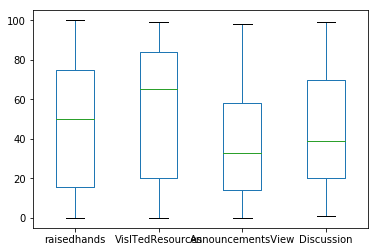

In [29]:
edu.plot.box()

In [30]:
edu.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

## Discretizando

## Algoritmos

In [31]:
def list_attrib_num(data):
    num = []
    
    for atributo, tipo in zip(data.columns, data.dtypes):
        if tipo != object:
            num.append(atributo)
            
    return num

In [32]:
for coluna in list_attrib_num(edu):
    under = 'under_mean_' + coluna
    over = 'over_mean_' + coluna
    edu[coluna] = [under if x < edu[coluna].mean() else over for x in edu[coluna]]

In [33]:
edu.gender = ['male' if x == 'M' else 'female' for x in edu.gender]

In [34]:
edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,male,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,under_mean_raisedhands,under_mean_VisITedResources,under_mean_AnnouncementsView,under_mean_Discussion,Yes,Good,Under-7,M
1,male,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,under_mean_raisedhands,under_mean_VisITedResources,under_mean_AnnouncementsView,under_mean_Discussion,Yes,Good,Under-7,M
2,male,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,under_mean_raisedhands,under_mean_VisITedResources,under_mean_AnnouncementsView,under_mean_Discussion,No,Bad,Above-7,L
3,male,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,under_mean_raisedhands,under_mean_VisITedResources,under_mean_AnnouncementsView,under_mean_Discussion,No,Bad,Above-7,L
4,male,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,under_mean_raisedhands,under_mean_VisITedResources,under_mean_AnnouncementsView,over_mean_Discussion,No,Bad,Above-7,M


In [35]:
edu_np = edu.to_numpy()

### Apriori

In [36]:
encoder = TransactionEncoder()
edu_encoded = encoder.fit(edu_np).transform(edu_np)
edu_encoded = pd.DataFrame(edu_encoded, columns=encoder.columns_)

In [52]:
frequent_itemsets = apriori(edu_encoded, min_support=0.35, use_colnames=True)
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8).sort_values(by='confidence', ascending=False)

CPU times: user 31.1 ms, sys: 0 ns, total: 31.1 ms
Wall time: 31.1 ms


### Fp-growth

In [44]:
def sup_item(data, item):
    sup_item = 0
    for transacao in data:
        if item in transacao:
            sup_item += 1

    return sup_item

In [45]:
def fp_growth(data, sup=0.1, conf=0.1):
    patterns = pyfpgrowth.find_frequent_patterns(data, sup*(len(data)))
    rules = pyfpgrowth.generate_association_rules(patterns, conf)
    list_aux = []
    
    for key, value in rules.items():
        
         if value[0] is not ():
            try:
                suport_x = patterns[key]/len(data)
            except:
                suport_x = sup_item(data, key)/len(data)

            try:
                suport_y = patterns[value[0]]/len(data)

            except:
                suport_y = sup_item(data, value[0])/len(data)

            conf = value[1]
            suport_xy = conf*suport_x

            try:
                conv = (1-suport_y)/(1-conf)

            except:
                conv = float("inf")
                

            dict_aux = {'antecedents':key, 
                        'consequents':value[0], 
                        'antecedent support': suport_x,
                        'consequent support': suport_y,
                        'support': suport_xy,
                        'confidence': conf,
                        'lift': conf/suport_y,
                        'conviction': conv,
                        'leverage': (conf*suport_x)- suport_x*suport_y}
            list_aux.append(dict_aux)
    return pd.DataFrame(list_aux)[['antecedents','consequents','antecedent support','consequent support',
                                   'support','confidence','lift','leverage','conviction']]

In [53]:
fp_growth(edu_np, 0.35, 0.8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(KW,)","(KuwaIT,)",0.372917,0.375000,0.368750,0.988827,2.636872,0.228906,55.937500
1,"(KuwaIT,)","(KW,)",0.375000,0.372917,0.368750,0.983333,2.636872,0.228906,37.625000
2,"(Mum,)","(Jordan,)",0.410417,0.725000,0.387500,0.944162,1.302293,0.089948,4.925000
3,"(M,)","(Jordan,)",0.439583,0.725000,0.356250,0.810427,1.117830,0.037552,1.450625
4,"(Jordan, over_mean_raisedhands)","(over_mean_VisITedResources,)",0.387500,0.564583,0.366667,0.946237,1.675991,0.147891,8.098750
5,"(over_mean_VisITedResources, over_mean_raisedh...","(Under-7,)",0.443750,0.602083,0.366667,0.826291,1.372387,0.099492,2.290709
6,"(Under-7, over_mean_VisITedResources)","(Jordan,)",0.447917,0.725000,0.375000,0.837209,1.154771,0.050260,1.689286
7,"(Under-7, over_mean_raisedhands)","(over_mean_VisITedResources,)",0.410417,0.564583,0.366667,0.893401,1.582408,0.134952,4.084623
8,"(A, MiddleSchool)","(Jordan,)",0.377083,0.725000,0.352083,0.933702,1.287864,0.078698,4.147917
9,"(Jordan, MiddleSchool)","(A,)",0.402083,0.589583,0.352083,0.875648,1.485197,0.115022,3.300434
